<a href="https://www.kaggle.com/code/avd1729/egyptian-heiroglyphs-classif-cnn?scriptVersionId=139824359" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Setting up the environment**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2723 non-null   object
 1   width     2723 non-null   int64 
 2   height    2723 non-null   int64 
 3   class     2723 non-null   object
 4   xmin      2723 non-null   int64 
 5   ymin      2723 non-null   int64 
 6   xmax      2723 non-null   int64 
 7   ymax      2723 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 170.3+ KB


In [4]:
valid_data = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv")

In [5]:
test_data = pd.read_csv("/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv")

# **Preprocessing image data**

In [6]:
import os
import cv2

train_folder = "/kaggle/input/egyptian-hieroglyphs/train/"
valid_folder = "/kaggle/input/egyptian-hieroglyphs/valid/"
test_folder = "/kaggle/input/egyptian-hieroglyphs/test/"

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
            else:
                continue
    return images


train_images = load_images_from_folder(train_folder)


In [7]:
valid_images = load_images_from_folder(valid_folder)

In [8]:
test_images = load_images_from_folder(test_folder)

In [9]:
train_labels = train_data['class'].tolist()
valid_labels = valid_data['class'].tolist()
test_labels = test_data['class'].tolist()

In [10]:
train_images = np.array(train_images)
valid_images = np.array(valid_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)
test_labels = np.array(test_labels)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
train_labels = encoder.fit_transform([train_labels])
valid_labels = encoder.fit_transform([valid_labels])
test_labels = encoder.fit_transform([test_labels])
train_labels = train_labels.flatten()
valid_labels = valid_labels.flatten()
test_labels = test_labels.flatten()

In [12]:
import gc
del(train_data)
del(valid_data)
del(test_data)

gc.collect()


# I am clearing the RAM from time to time as the memory need is exceeding the available memory :/

0

# **CNN Architecture**

In [13]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=8, kernel_size=4,input_shape=[640, 640, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=16),
    DefaultConv2D(filters=16),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=16, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 640, 8)       392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 320, 320, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 320, 16)      1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 320, 320, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 160, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 160, 32)      4

# **Training the model**

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(valid_images, valid_labels))
score = model.evaluate(test_images, test_labels)

Epoch 1/10
86/86 [==============================] - 43s 234ms/step - loss: 35.7192 - accuracy: 0.8160 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2/10
86/86 [==============================] - 19s 216ms/step - loss: 0.4574 - accuracy: 0.8535 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/10
86/86 [==============================] - 19s 219ms/step - loss: 0.3955 - accuracy: 0.8795 - val_loss: 5.6232e-04 - val_accuracy: 1.0000
Epoch 4/10
86/86 [==============================] - 18s 213ms/step - loss: 0.3387 - accuracy: 0.9008 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
86/86 [==============================] - 19s 216ms/step - loss: 0.3145 - accuracy: 0.9185 - val_loss: 5.3381e-04 - val_accuracy: 1.0000
Epoch 6/10
86/86 [==============================] - 19s 225ms/step - loss: 0.2792 - accuracy: 0.9302 - val_loss: 8.7999e-04 - val_accuracy: 1.0000
Epoch 7/10
86/86 [==============================] - 18s 211ms/step - loss: 0.2316 - accuracy: 0.9464 - val_loss: 2.8251e-04 - val

In [16]:
score

[7.261250721057877e-05, 1.0]

In [17]:
del(train_images)
del(train_labels)
del(valid_images)
del(valid_labels)
del(test_images)
del(test_labels)

gc.collect()

2318

# **Error analysis**

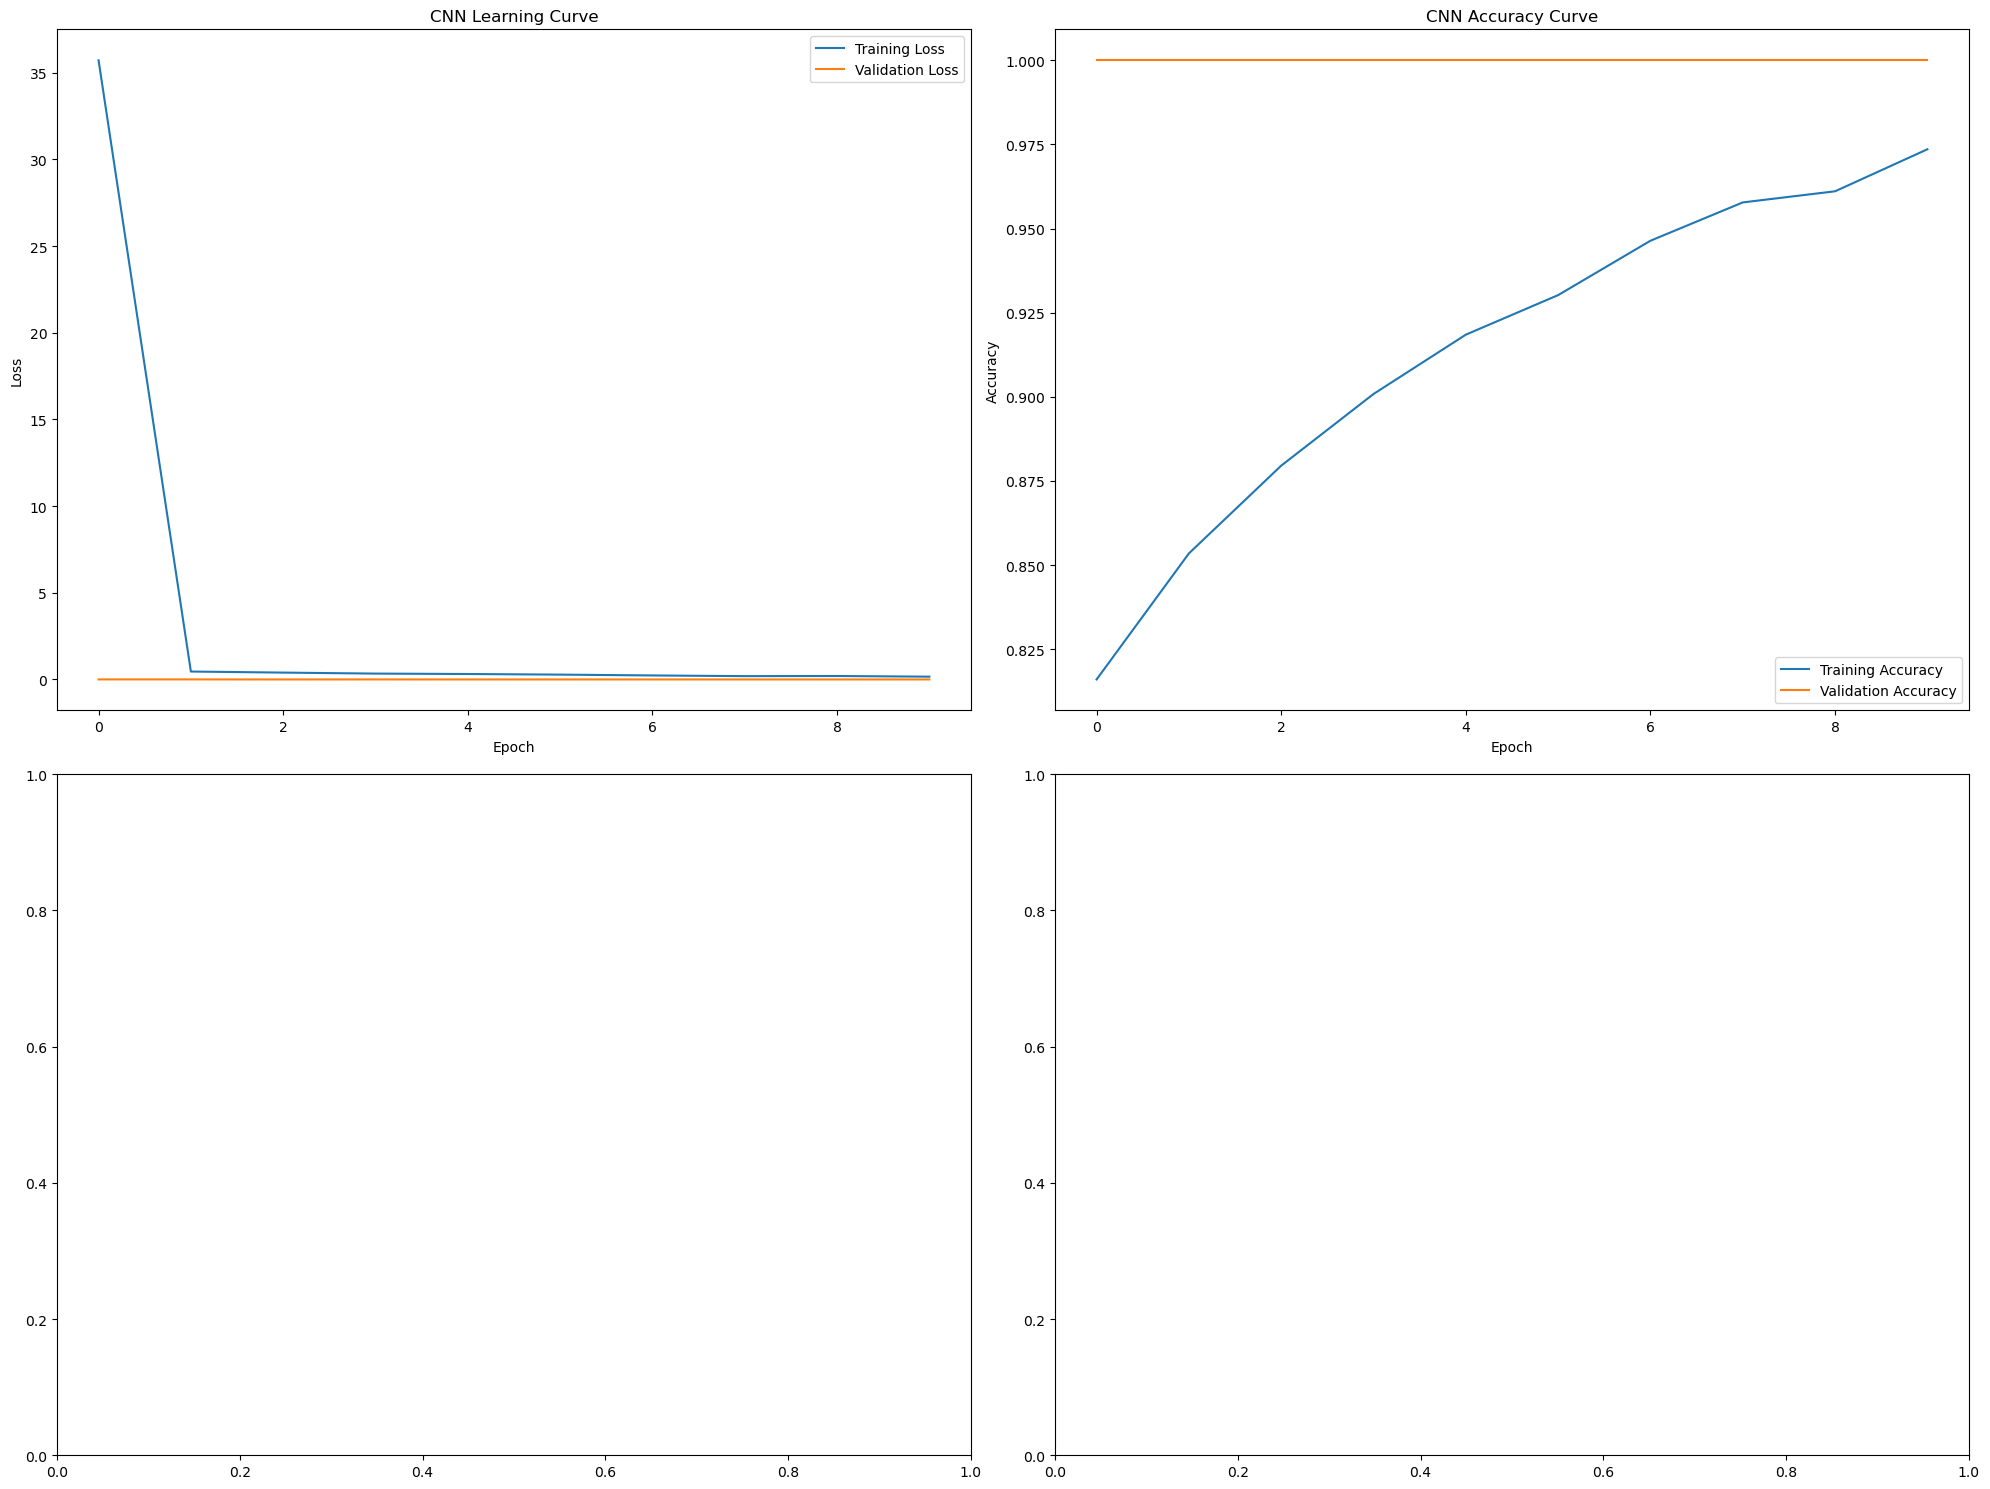

In [18]:
import matplotlib.pyplot as plt


def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()


def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


fig, axs = plt.subplots(2,2,figsize=(20, 15))
plot_learning_curves(history, 'CNN', axs[0, 0])
plot_accuracy_curves(history, 'CNN', axs[0, 1])

plt.tight_layout()
plt.show()